<a href="https://colab.research.google.com/github/Wangmiaobeng/MMA_Share/blob/master/MMA869Individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMA 869
* **Machine Learning and AI**
* **Dr. Stephen W. Thomas**
* **Individual Assignment 1**


# 1.	HOW LOVELY!



[For this question, please answer the parts below in English, and also turn in your code. Your code should be submitted as a notebook – either a Python Jupyter Notebook (.ipynb) or an R Markdown file (.Rmd), along with a PDF rendering of the notebook. Make your code completely reproducible. E.g., set random number seeds.]
You work at a local jewelry store. You’ve recently been promoted and the store owner asked you to better understand your customers. Using some sneaky magic (and the help of Environics!), you’ve managed to collect some useful features for a subset of your customers: age, income, spending score, and savings. Use these to segment your customers and create customer personas.

## 1.1 Coding Part (You can skip this and check the answers below)

#### Import Packages

In [0]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

from yellowbrick.cluster import (
    SilhouetteVisualizer,
    InterclusterDistance,
    KElbowVisualizer,
)

import itertools

import scipy

import pandas_profiling

# The following is just to change the display settings.
InteractiveShell.ast_node_interactivity = "all"
pd.set_option("display.max_colwidth", 200)
pd.options.display.max_columns = None

%matplotlib inline


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Load data

In [0]:
df = pd.read_csv("/content/drive/My Drive/MMA/MMA869/jewelry_customers.csv")

In [0]:
df.head()
df.info()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
Age              505 non-null int64
Income           505 non-null int64
SpendingScore    505 non-null float64
Savings          505 non-null float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [0]:
X = df.copy()
scaler = StandardScaler()
X[list(X)] = scaler.fit_transform(X[list(X)])
X.head()

,Age,Income,SpendingScore,Savings
0,-0.042287,0.062733,1.103593,-1.072467
1,-0.000821,0.174811,1.102641,-1.303473
2,0.123577,-0.021200,0.761727,-0.526556
3,-0.000821,-0.031712,1.004705,-0.913395
4,1.160228,-1.606165,-0.602619,1.012686


#### Normalize data

In [0]:
X = df.copy()
scaler = StandardScaler()
X[list(X)] = scaler.fit_transform(X[list(X)])
X.head()

,Age,Income,SpendingScore,Savings
0,-0.042287,0.062733,1.103593,-1.072467
1,-0.000821,0.174811,1.102641,-1.303473
2,0.123577,-0.021200,0.761727,-0.526556
3,-0.000821,-0.031712,1.004705,-0.913395
4,1.160228,-1.606165,-0.602619,1.012686


#### Elbow Method
##### find the bestfi k for k-means
I first use Elbow method to find the best k (the number of clusters). According to the plots below, 5 is the best cluster number in this case. Here is the reason:

In Silhouette score elbow for Kmeans Clustering, when k is 5, we got the highest Silhouette score, which means that, at this point, the cluster is farthest away from the closest neighbouring cluster. So, 5 is the best k number.

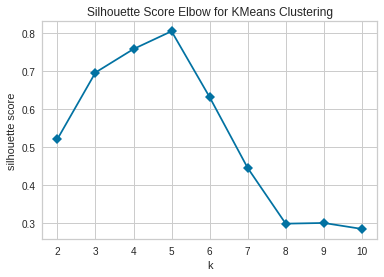

In [0]:
model = KMeans(init="k-means++", random_state=23)
KElbowVisualizer(model, k=(2, 11), metric="silhouette", timings=False).fit(X).poof()

***According to the plos above, 5 is the best cluster number***
#### Try differnet k with Internal Validation Metrics
I use a for loop to try different k value (from 2 to 10)
Based on InterclusterDistance plot, we can find that 5 is the best clustering number. There is no overlapping between each two circles. Besides the distance between each others looks good.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=23, tol=0.0001, verbose=0)

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa97de65b00>,
                     model=None)

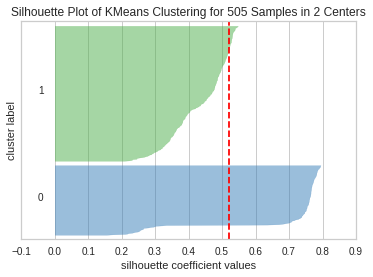

InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa97ddfa7b8>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=40, scoring='membership')

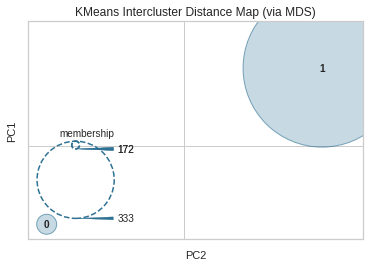

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=23, tol=0.0001, verbose=0)

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa97dcf7a20>,
                     model=None)

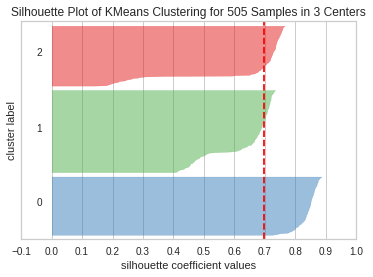

InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa97dcdb7b8>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=40, scoring='membership')

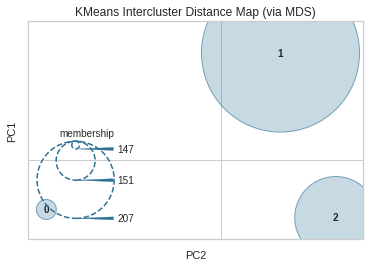

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=23, tol=0.0001, verbose=0)

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa97dc4f780>,
                     model=None)

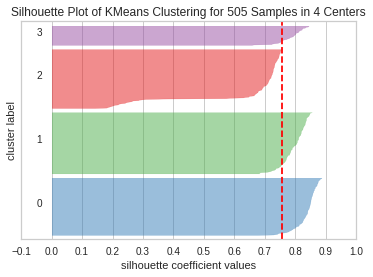

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa97dc44630>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=40, scoring='membership')

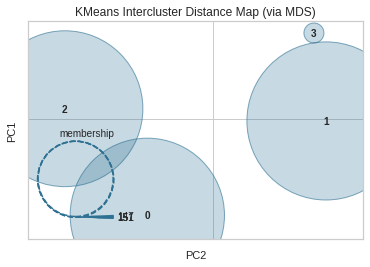

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=23, tol=0.0001, verbose=0)

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa97db3de80>,
                     model=None)

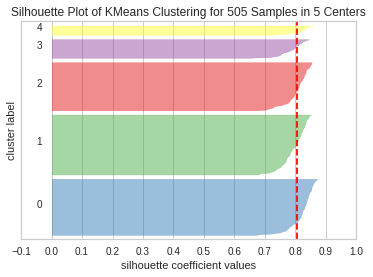

InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa97dbbaac8>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=40, scoring='membership')

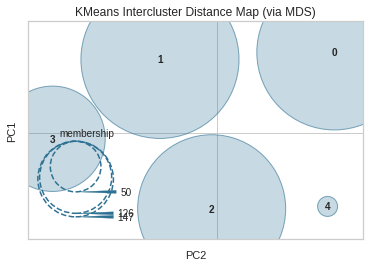

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=23, tol=0.0001, verbose=0)

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa97da9ae10>,
                     model=None)

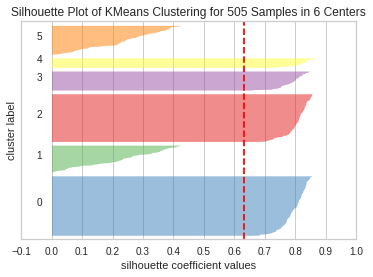

InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa97da05550>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=40, scoring='membership')

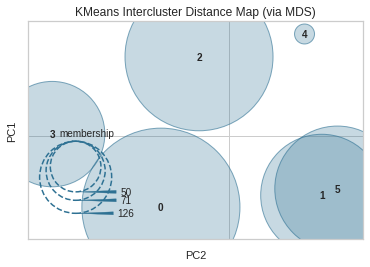

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=23, tol=0.0001, verbose=0)

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa97d987b70>,
                     model=None)

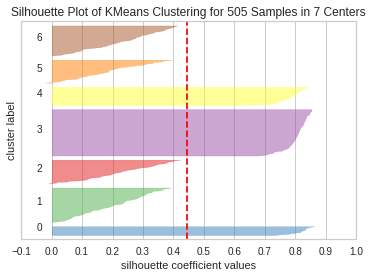

InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa97d8f51d0>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=40, scoring='membership')

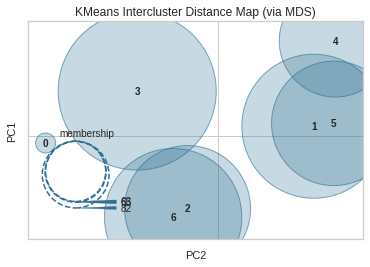

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=23, tol=0.0001, verbose=0)

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa97d876f28>,
                     model=None)

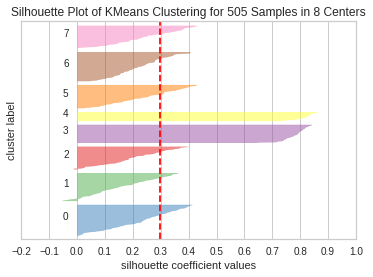

InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa97d8eb320>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=40, scoring='membership')

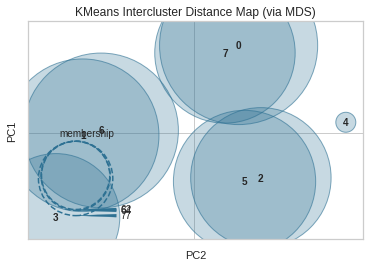

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=23, tol=0.0001, verbose=0)

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa97de4eef0>,
                     model=None)

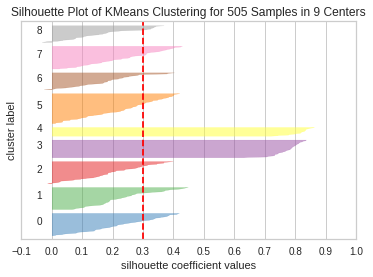

InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa97de64748>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=40, scoring='membership')

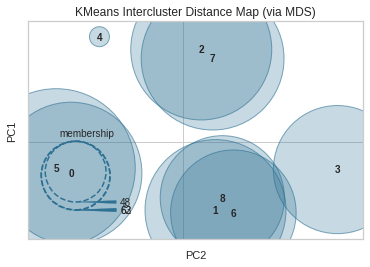

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=23, tol=0.0001, verbose=0)

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa97d9feeb8>,
                     model=None)

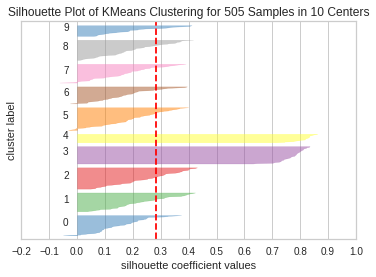

InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa97d9fe320>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=40, scoring='membership')

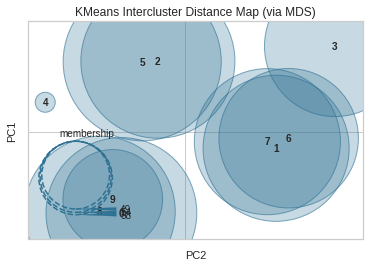

In [0]:
for i in range(2, 11):
    kmeans = KMeans(init="k-means++", n_clusters=i, random_state=23)
    kmeans.fit(X)

    visualizer = SilhouetteVisualizer(kmeans)
    visualizer.fit(X)
    visualizer.poof()

    # Instantiate the clustering model and visualizer
    visualizer = InterclusterDistance(kmeans, random_state=40)
    visualizer.fit(X)  # Fit the training data to the visualizer
    visualizer.poof()  # Draw/show/poof the data

***According to the plots above, 5 is the best clustering number***

#### K-Means

In [0]:
k_means = KMeans(init="k-means++", n_clusters=5, random_state=23)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=23, tol=0.0001, verbose=0)

In [0]:
result = df.copy()
result["group"] = k_means.labels_
result.head()

,Age,Income,SpendingScore,Savings,group
0,58,77769,0.791329,6559.829923,1
1,59,81799,0.791082,5417.661426,1
2,62,74751,0.702657,9258.992965,1
3,59,74373,0.765680,7346.334504,1
4,87,17760,0.348778,16869.507130,0


In [0]:
for label in result.group.unique():
    print("\nCluster {}:".format(label))
    result[result.group == label].head()


Cluster 1:


,Age,Income,SpendingScore,Savings,group
0,58,77769,0.791329,6559.829923,1
1,59,81799,0.791082,5417.661426,1
2,62,74751,0.702657,9258.992965,1
3,59,74373,0.765680,7346.334504,1
6,54,76500,0.785198,6878.884249,1



Cluster 0:


,Age,Income,SpendingScore,Savings,group
4,87,17760,0.348778,16869.507130,0
7,87,42592,0.355290,18086.287158,0
8,83,34384,0.324719,14783.379086,0
9,84,27693,0.367063,17879.558906,0
17,87,31481,0.317424,16180.688082,0



Cluster 3:


,Age,Income,SpendingScore,Savings,group
5,29,131578,0.847034,3535.514352,3
25,30,122788,0.872872,5706.149573,3
26,17,134966,0.907242,4128.044796,3
42,20,129142,0.887052,5603.121028,3
45,18,130813,0.890891,5256.434560,3



Cluster 4:


,Age,Income,SpendingScore,Savings,group
10,85,111389,0.036795,16009.237763,4
15,92,122879,0.060724,13709.670275,4
19,88,120678,0.063273,14264.473847,4
21,84,122696,0.082187,13809.734087,4
24,89,119697,0.091679,16215.399077,4



Cluster 2:


,Age,Income,SpendingScore,Savings,group
11,36,99780,0.265433,16398.401333,2
12,30,99949,0.344679,13621.639726,2
13,31,107963,0.290509,13407.081391,2
20,30,101073,0.314387,14324.555977,2
34,33,101058,0.315082,14911.868398,2


#### Find Examplars
find the observation that is closest to the cluster center

In [0]:
from scipy.spatial import distance

for i, label in enumerate(set(k_means.labels_)):
    X_tmp = df[k_means.labels_ == label].copy()

    exemplar_idx = distance.cdist([k_means.cluster_centers_[i]], X_tmp).argmin()
    exemplar = pd.DataFrame(X_tmp.iloc[exemplar_idx])

    print("\nCluster {}:".format(label))
    exemplar


Cluster 0:


,320
Age,87.000000
Income,12000.000000
SpendingScore,0.342991
Savings,16180.265252



Cluster 1:


,278
Age,59.000000
Income,56321.000000
SpendingScore,0.806566
Savings,6129.288986



Cluster 2:


,339
Age,34.000000
Income,89598.000000
SpendingScore,0.340152
Savings,12832.768721



Cluster 3:


,360
Age,28.000000
Income,117108.000000
SpendingScore,0.857078
Savings,4749.879237



Cluster 4:


,368
Age,84.000000
Income,110582.000000
SpendingScore,0.079049
Savings,14937.995170


#### Snake Plot

Text(0.5, 1.0, 'Snake Plot, K-Means, K=5')

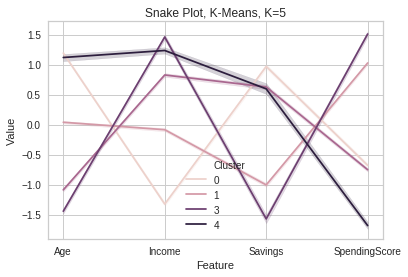

In [0]:
import seaborn as sns

dat = X.copy()

dat["Cluster"] = k_means.labels_

datamart_melt = pd.melt(
    dat.reset_index(),
    id_vars=["Cluster"],
    value_vars=["Age", "Income", "SpendingScore", "Savings"],
    var_name="Feature",
    value_name="Value",
)

plt.title("Snake Plot, K-Means, K=5")
sns.lineplot(x="Feature", y="Value", hue="Cluster", data=datamart_melt)

#### Relative Importance Plots

<Figure size 576x144 with 0 Axes>

Text(0.5, 1.0, 'Relative importance of features')

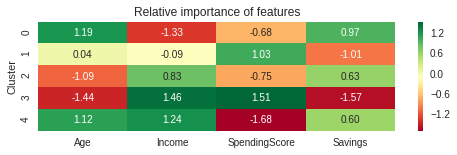

In [0]:
cluster_avg = dat.groupby(["Cluster"]).mean()
population_avg = dat.drop(["Cluster"], axis=1).mean()

relative_imp = cluster_avg - population_avg

plt.figure(figsize=(8, 2))
plt.title("Relative importance of features")
sns.heatmap(data=relative_imp, annot=True, fmt=".2f", cmap="RdYlGn")

## 1.2 Answer:

### 1.	Download the customer dataset: jewelry_customers.csv.

I have downloaded the dataset and run the code. Please check the Jupyter notebook.

### 2.	Perform a clustering analysis of the dataset.  a.	Try different values of parameters (e.g., K for K-means), and describe what you think the best values are and why.

I used k-means to do clustering.

I first use Elbow method to find the best k (the number of clusters). According to the plots below, 5 is the best cluster number in this case. Here is the reason:

In Silhouette score elbow for Kmeans Clustering, when k is 5, we got the highest Silhouette score, which means that, at this point, the cluster is farthest away from the closest neighbouring cluster. So, 5 is the best k number.




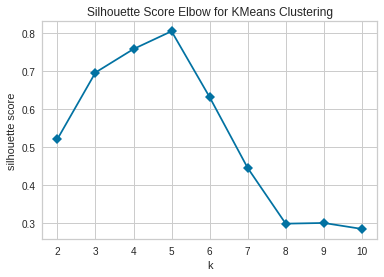

In [0]:
model = KMeans(init="k-means++", random_state=23)
KElbowVisualizer(model, k=(2, 11), metric="silhouette", timings=False).fit(X).poof()


I use a for loop to try different k value (from 2 to 10). Based on InterclusterDistance plot, we can find that 5 is the best clustering number. There is no overlapping between each two circles. Besides the distance between each other looks good.


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=23, tol=0.0001, verbose=0)

InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa97b9ddf60>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=40, scoring='membership')

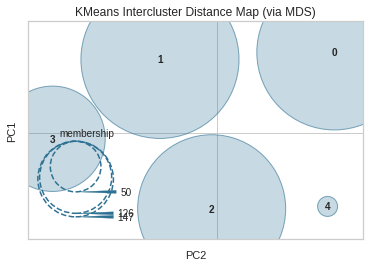

In [0]:
kmeans = KMeans(init="k-means++", n_clusters=5, random_state=23)
kmeans.fit(X)

visualizer = InterclusterDistance(kmeans, random_state=40)
visualizer.fit(X)  # Fit the training data to the visualizer
visualizer.poof()  # Draw/show/poof the data

### 3.	Document your findings. Describe and interpret the clusters.

I tried three ways to interpret the clusters, which are snake plot, relative importance measures and exemplars. The three methods show the same conclusion.

Cluster 0: The customers’ age is highest. The income is the lowest. The savings is the highest and the spending score is relative low. These customers are the senior people whose income is low and savings are high.

Cluster 1: The customers’ age is around 59. The income is in the middle. The savings are relative low and the spending score is relative high. These customers are the middle-aged people whose income is about average and love jewelry.

Cluster 2: The customers’ age is relative low, which is around 34. The income is in relative high. The savings are relative high and the spending score is relative low. These customers are the people around 34, whose has good income and savings but do not spend too much on jewelry. 

Cluster 3: The customers’ age is lowest. The income is the highest. The savings is the lowest and the spending score is the highest. These customers are the young people whose income is very high willing to spend on jewelry. 

Cluster 4: The customers’ age, income and saving is relative high. The spending score is the lowest. These customers are the old people whose income is high but spend little on jewelry. 

Obviously, the best customer is cluster 3. These young people has the highest income and spend a lot on jewelry. The store can be more focus on these customers.


**SnakePlot**

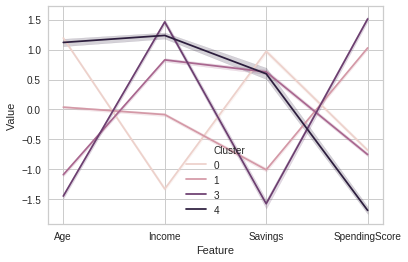

In [0]:
sns.lineplot(x="Feature", y="Value", hue="Cluster", data=datamart_melt)

**Heatmap**

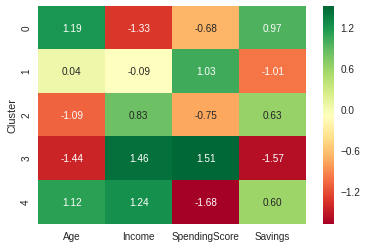

In [0]:
sns.heatmap(data=relative_imp, annot=True, fmt=".2f", cmap="RdYlGn")

**Examplar**

In [0]:
for i, label in enumerate(set(k_means.labels_)):
    X_tmp = df[k_means.labels_ == label].copy()

    exemplar_idx = distance.cdist([k_means.cluster_centers_[i]], X_tmp).argmin()
    exemplar = pd.DataFrame(X_tmp.iloc[exemplar_idx])

    print("\nCluster {}:".format(label))
    exemplar


Cluster 0:


,320
Age,87.000000
Income,12000.000000
SpendingScore,0.342991
Savings,16180.265252



Cluster 1:


,278
Age,59.000000
Income,56321.000000
SpendingScore,0.806566
Savings,6129.288986



Cluster 2:


,339
Age,34.000000
Income,89598.000000
SpendingScore,0.340152
Savings,12832.768721



Cluster 3:


,360
Age,28.000000
Income,117108.000000
SpendingScore,0.857078
Savings,4749.879237



Cluster 4:


,368
Age,84.000000
Income,110582.000000
SpendingScore,0.079049
Savings,14937.995170


### 4.	How good are the results?

I think the result is very good. First of all, the Silhouette score is over 0.8, which is very high. It means the clusters has good distance between each other. The snake plot shows that lines are not overlapping and have different combination of low, medium and high value on the features. The InterclusterDistance plot clearly shows 5 area without overlapping. The exemplars give us a sample of each cluster, which is easy to understand. Overall, the result is satisfied.

# 2.	CATCHING RECIDIVISTS BEFORE THEY STRIKE

A recidivist is a criminal that was released from prison, but commits another crime. You are a warden at a maximum-security prison in Kingston, and you want to determine which prisoners will likely become recidivists. Luckily, you have a Queen’s degree, so you are going to take a data-driven approach. You have collected some historical training data that include some basic metadata, and whether the prisoner ended up becoming a recidivist or not.
Given the training data below, use the ID3 algorithm and entropy-based information gain to construct a decision tree by hand to predict which prisoners will become recidivists. Show all the steps. Use the resulting decision tree to predict the class of the following prisoner: Good Behavior = false, Age < 30 = false, Drug dependent = true.

| id | Good Behavior | Age < 30 | Drug Dependent | Recidivist |
|----|---------------|----------|----------------|------------|
| 1  | False         | True     | False          | True       |
| 2  | False         | False    | False          | False      |
| 3  | False         | True     | False          | True       |
| 4  | True          | False    | False          | False      |
| 5  | True          | False    | True           | True       |
| 6  | True          | False    | False          | false      |

## 2.1 Answer:

* Calculate information gain
*	E(Recidivist)=E(3, 3)=E(0.5, 0.5)= -0.5 log2(⁡0.5)-0.5 log2(⁡0.5)=0.97
* E(Recidivist, GoodBehavior)=P(False)E(2,1)+P(True)E(1,2)=0.5*0.92+0.5*0.92=0.92
* Gain(Recidivist, GoodBehavior)= E(Recidivist)- E(Recidivist, GoodBehavior)=0.97-0.92=0.05
* Gain(Recidivist, age)= 0.97-2/6*0-4/6*0.81=0.43
* Gain(Recidivist, DrugDependent)=0.97-1/6*0-5/6*0.97=0.16
* Because the Gain(Recidivist, age) is the highest, we first split data from this one.
* Since the prisoner we want to predict is older than 30, so we filter the data and get the following:

  
| id | Good Behavior | Age < 30 | Drug Dependent | Recidivist |
|----|---------------|----------|----------------|------------|
| 2  | False         | False    | False          | False      |
| 4  | True          | False    | False          | False      |
| 5  | True          | False    | True           | True       |
| 6  | True          | False    | False          | false      |

* Gain’(Recidivist, GoodBehavior)=0.81-1/4*0-3/4*0.92=0.12
* Gain’(Recidivist, DrugDependent)=0.81-1/4*0-3/4*0=0.81
* Because the Gain(Recidivist, DrugDependent) is the highest in this level, we split data from this one.
* Since the prisoner we want to predict is has drug dependent, so we filter the data and get the following:

| id | Good Behavior | Age < 30 | Drug Dependent | Recidivist |
|----|---------------|----------|----------------|------------|
| 5  | True          | False    | True           | True       |

* So we can stop here. I will predict Recidivist as True.

# 3.	MORE CLASSIFICATION MEASURES



In class, we talked about several classification measures, such as accuracy, precision, recall, AUC, etc. There are many other measures out there, each with its own pros and cons. 
Do a bit of research of your own to find at least two classification measures that we did not discuss in class. For each measure, describe what it is, how it is calculated, how it is different from accuracy, and in which scenarios it is best used. Show some example datasets/confusion matrices to illustrate your points.

## 3.1 Answer:

1.	

* classification measure name: Diagnostic odds ratio (DOR)

* The Diagnostic odds ratio =TP x TN/(FP x FN)
DOR is utilized for estimating the discriminative ability of the test and also for comparing between two diagnostic tests. The cons is that if there is a zero in FP or FN. Then DOR cannot be applied in this case.
* Here is an example:

| Confusion matrix 1 |       |
|--------------------|-------|
| TP 60              | FN 20 |
| FP 10              | TN 10 |


| Confusion matrix 2  || 
|-----------|-----------|
| TP        65	|FN   15 |
| FP        15	|TN   5  |

* Accuracy_1=(TP+TN)/(TP+TN+FP+FN)=70/100=0.7
* DOR_1= TP x TN/(FP x FN)=60x10/(10*20)=3

* Accuracy_2=(TP+TN)/(TP+TN+FP+FN)=70/100=0.7
* DOR_2= TP x TN/(FP x FN)=65x5/(15*15)=1.44

  

* In this example, the accuracy is the same for both confusion matrices. But the DOR_1 is larger than DOR_2. Because the formula of DOR use TP x TN comparing to Accuracy using TN + TP. As we all know, the product of two real number is maximum when the numbers are equal give sum is constant, So, if two models have the same accuracy, the model with higher DOR should be a more balanced model to give the TP and TN. 


2.	
* classification measure name: Youden’s index (YI)
* Youden’s index=TPR+TNR-1=TP/(TP+FN)+TN/(TN+FP)-1
YI evaluates the discriminative power of the test. The YI metric is ranged from zero when the test is poor to one which represents a perfect diagnostic test. It is also suitable with imbalanced data. One of the major disadvantages of this test is that it does not change concerning the differences between the sensitivity and specificity of the test.
* Here is an example:

| Confusion matrix 1 |       |
|--------------------|-------|
| TP 60              | FN 20 |
| FP 10              | TN 10 |


| Confusion matrix 2  || 
|-----------|-----------|
| TP        65	|FN   15 |
| FP        15	|TN   5  |


* Accuracy_1=(TP+TN)/(TP+TN+FP+FN)=70/100=0.7
* YI_1= TP/(TP+FN)+TN/(TN+FP)-1=60/80+10/20-1=0.75+0.5-1=0.25

* Accuracy_2=(TP+TN)/(TP+TN+FP+FN)=70/100=0.7
* YI_2= TP/(TP+FN)+TN/(TN+FP)-1=65/80+5/20-1=0.8125+0.25-1=0.0625

* In this example, two models have the same accuracy. But if the accuracy is the same, the Yi score is quite different, the one with higher YI score has overall better balance of specificity and sensitivity.




# 4.	THE INTERN


You are an in-demand, world-traveling, work-all-night consultant who specializes in designing supervised machine learning solutions for clients in a wide-range of industries. You have seen it all and you know what to do. To help you get more done in less time, you have hired an intern from Ivey, who, unfortunately, needs some handholding. Your intern does not understand when to use which classification measure. Your intern keeps getting it wrong. To help your intern learn from your experience, you have decided to look at some previous projects and describe which measure you used, and more importantly, why. 
For each project below, describe which measure(s) are best, and why. Also, give an example of a measure which would be horrible to use, and why. List any assumptions you are making, about the dataset, problem, or business priorities that were involved in the project.


## 4.1 Answer:

#### a)	The fraud department at a bank wanted to predict which transactions were fraudulent. The training dataset had 100K credit card transactions, of which 97K are legit and 3K are fraud.

1.	I will use recall to measure in this case. 
2.	Assumption: A fraud will cause a huge loss and the cost of following up potentially fraudulent.
3.	Because the huge loss and not much on following up the case, so we do not want to miss the true positive, which means when the Fraud is actually true our model should predict it as true. Also this may cause more false positive. Since in my assumption that the cost of following up potentially fraudulent is not high, Recall is a good measurement to use.
4.	It is horrible to use accuracy to measure in this case. Because the data is imbalance, the model will predict all the result as legit and get 97% accuracy. So, it is not wise to use accuracy in the case.


#### b)	A hospital wanted to predict whether a MRI scan contained cancer.

1.	I will use F1 score to measure in this case.
2.	Assumption: Most of people who have MRI scan do not have cancer. So, the data may not imbalance.
3.	In this case, because we need to deal with the imbalance data, we want to balance both recall and precision. Since F1 score equals 2 * precision * recall / (precision + recall), F1 score is a good way to measure the model.
4.	It is horrible to use accuracy to measure in this case. Because the data is imbalance, the model will predict all the result as no cancer and get high accuracy. So, it is not wise to use accuracy in the case.


#### c)	An IT team wanted to filter spam from email inboxes.

1.	I will use precision to measure in this case.
2.	Assumption: We need to avoid predicting an important email as spam (Avoid FP)
3.	In this case, if the model predict the spam as true, we want to have high confidence to make sure that it is actual spam. Precision equals to TP/ (TP + FP), which is what we want in this case.
4.	It is horrible to use specificity to measure in this case. The model will only predict a mail as non-spam when it is very sure, which means it will cause more normal mail be treated as spam.  


#### d)	A sports analytics department wants to predict which team will win the match.

1. I will use ROC/AUC to measure in this case.
2. Assumption: The department wants to know some of which matches they have high probability to win and some of which mataches they will probably lose.
3. In this case, we will choose the model with highest AUC score. Then, we can check the prediction result to tell which part of prediction we have high confidence to believe the result.
4. It is horrible to use specificity to measure in this case. The model will only predict a game as lose when it is very sure, which means that the accuracy to for predicting winning will be sacrifised.

#### e)	A city government wanted to build a system to monitor Twitter to see if any local residents were tweeting about emergencies that needed quick response from the police department. They don’t trust Twitter that much; they only want to send police in true emergencies.

1.	I will use precision to measure in this case.
2.	Assumption: We need to avoid wrong emergency alert (Avoid FP).
3.	In this case, if the model predict the emergency as true, we want to have high confidence to make sure that it is actual emergency. Precision equals to TP/ (TP + FP), which is what we want in this case.
4.	It is horrible to use specificity TN/(TN+FP) to measure in this case. The model will only predict non-emergency when it is very sure, which means it will cause more emergency alerts.  

#### f)	 [Describe one more project, whereby the best measure is one that you have not yet listed in parts a-e above.]

1. Project: A company is preparing an event, it has invited a lot of guests. Since they have the history data of previous events, they want to have a model to predict who will come on event day.
2. I will use log loss to measure in this case.
2. Assumption: They only care about how many people in total will come.
3. In this case, since I conly care about the overal situation instead of individual, I want to use log loss to penalize models being very wrong.
4. It is horriable to use precision to measure in this case. The model will make sure the precise of prediacting people who will come. But it will sacrifice the overall accuracy. So, it is better to use log loss in this case.

# 5.Uncle STEVE’S GROCERY STORE



Uncle Steve runs a small, local grocery store. Looking for some customer insights, he has hired you to do some data science. He has given you a few years’ worth of customer transactions, i.e., sets of items that customers have purchased. You have applied an association rules learning algorithm to the data, and the algorithm has generated a large set of association rules.  
For each of the following scenarios, provide an example of one of the discovered association rules that satisfies the following conditions. (Just make up the rule, using your human experience and intuition!) Also, describe whether and why each rule would be considered subjectively interesting or uninteresting for Uncle Steve.

## 5.1 Answer:

#### a)	A rule that has high support and high confidence.

{egg} → {milk} 

* These two items are both high frequency purchasing items. It is uninteresting for Uncle Steve because it is a common sense that people will often buy egg and milk together (High support). Besides, Uncle Steve will not be surprised that people will buy milk when they buy eggs (High confidence).


#### b)	A rule that has reasonably high support but low confidence.

{egg} → {bacon} 

* Most people will buy eggs when they shop at a grocery store. But, bacon is not as popular as eggs. 

* This rule has reasonably high support since they are both daily food which has a relative high purchasing frequency. However, the confidence is low because when people buy eggs, they do not always buy bacon.

* I think this is interesting to Uncle Steve because he will realize that giving a discount to eggs will not influence the sales of bacon much.


#### c)	A rule that has low support and low confidence.

{Christmas tree} → {Halloween pumpkin} 

* These two items are both low frequency purchasing items. People probably buy once a year. Furthermore, since Halloween is in October, there is very low possibility that people will buy Halloween pumpkin when people buy Christmas tree. So, this rule has low support and low confidence.

* This rule is not interesting to Uncle Steve because it is a common sense and he must know this result.


#### d)	A rule that has low support and high confidence.

{outdoor grills} → {barbecue charcoal}

* Since outdoor grills are very low frequency purchasing item, the support should be very low. But, when people by outdoor grills will always buy barbecue charcoal when they buy outdoor grill, which will give this rule a high confidence.

* I think this is interesting to Uncle Steve. He will realize that giving discount to barbecue charcoal will not increase the sales of outdoor grills. Instead, he can give a bundle promotion of these two items since the confidence is high. This may help to increase the sale of outdoor grills.

# 6.	ASSOCIATION RULES, TWO WAYS




Consider the following table of customer transactions.

| Customer ID | Transaction ID | Items Bought |
|-------------|----------------|--------------|
| 1           | 0001           | {a, d, e}    |
| 1           | 0024           | {a, b, c, e} |
| 2           | 0012           | {a, b, d, e} |
| 2           | 0031           | {a, c, d, e} |
| 3           | 0015           | {b, c, e}    |
| 3           | 0022           | {b, d, e}    |
| 4           | 0029           | {c, d}       |
| 4           | 0040           | {a, b, c}    |
| 5           | 0033           | {a, d, e}    |
| 5           | 0038           | {a, b, e}    |

## 6.1 Answer:

#### a)	Compute the support for itemsets {e}, {b,d}, and {b,d,e} by treating each transaction ID as a market basket (i.e., the normal way).

| Customer ID | Transaction ID | Items Bought | a | b | c | d | e |
|-------------|----------------|--------------|---|---|---|---|---|
| 1           | 1              | {a, d, e}    | 1 | 0 | 0 | 1 | 1 |
| 1           | 24             | {a, b, c, e} | 1 | 1 | 1 | 0 | 1 |
| 2           | 12             | {a, b, d, e} | 1 | 1 | 0 | 1 | 1 |
| 2           | 31             | {a, c, d, e} | 1 | 0 | 1 | 1 | 1 |
| 3           | 15             | {b, c, e}    | 0 | 1 | 1 | 0 | 1 |
| 3           | 22             | {b, d, e}    | 0 | 1 | 0 | 1 | 1 |
| 4           | 29             | {c, d}       | 0 | 0 | 1 | 1 | 0 |
| 4           | 40             | {a, b, c}    | 1 | 1 | 1 | 0 | 0 |
| 5           | 33             | {a, d, e}    | 1 | 0 | 0 | 1 | 1 |
| 5           | 38             | {a, b, e}    | 1 | 1 | 0 | 0 | 1 |

* S{e}=8/10=0.8
* S{b,d}=2/10=0.2
* S{b,d,e}=2/10=0.2


#### b)	Use the results in part (a) to compute the confidence for the association rules {b,d} → {e} and {e} → {b,d}. Is confidence a symmetric measure?

* C({b,d} → {e})=0.2/0.2=1
* C({e} → {b,d})=0.2/0.8=0.25
* Confidence is not a symmetric measure.


#### c)	Repeat part (a) by treating each customer ID as a market basket. Each item should be treated as a binary feature (i.e., 1 if an item appears in at least one transaction bought by the customer, and 0 otherwise). 

| Customer ID | a | b | c | d | e |
|-------------|---|---|---|---|---|
| 1           | 1 | 1 | 1 | 1 | 1 |
| 2           | 1 | 1 | 1 | 1 | 1 |
| 3           | 0 | 1 | 1 | 1 | 1 |
| 4           | 1 | 1 | 1 | 1 | 0 |
| 5           | 1 | 1 | 0 | 1 | 1 |

* S{e}=4/5=0.8
* S{b,d}=5/5=1
* S{b,d,e}=4/5=0.8

* C({b,d} → {e})=0.8/1=0.8
* C({e} → {b,d})=0.8/0.8=1


# 7.	VIVA LA VINO



Some Smith faculty have started a wine club. At each meeting, members of the club perform blind taste tests of different wine varietals. Members indicate how much they enjoy each varietal, using an integer scale of 1 (worst) to 7 (best). After the most recent meeting, here are the ratings.

|  |Zin    | Pinot Noir | Chard | Merlot | Cab | Pinot Gris |  
|--------|------------|-------|--------|-----|------------|---|
| Yuri   | 7          | 6     | 7      | 4   | 5          | 4 |
| Steve  |            | 7     | 6      | 4   | 3          | 4 |
| Gary   | 3          | 3     | 3      | 1   | 1          | 5 |
| Qurat  | 2          | 2     | 1      | 3   | 7          | 4 |
| Brigid | 5          | 6     | 7      | 2   | 3          | 3 |

Unfortunately, the club ran out of Zin before Steve had a chance to try it. Luckily, the club has you, a data-driven, clever, and charming Queen’s student. Use your skills to predict what Steve would rate Zin. Use user-based collaborative filtering with cosine distance. To predict the rating, find the two nearest neighbors and take the weighted average of their scores of the item in question.
Hints:
	Recall that the cosine distance is calculated as  〖dist〗_cos (A,B)=1-(∑_(i=0)^n▒〖A_i B_i 〗)/(√(∑_(i=0)^n▒A_i^2 ) √(∑_(i=0)^n▒B_i^2 ))
	When comparing two users, only include items that both users have rated.  For example, to compare Yuri and Steve, the calculation would ignore Zin (since Steve hasn’t rated it) and would be 1-(7*6+6*7+4*4+5*3+4*4)/(√(7^2+6^2+4^2+5^2+4^2 ) √(6^2+7^2+4^2+3^2+4^2 ))=0.021.
	To find the weighted average of two ratings R1 and R2, which have a distances D1 and D2 respectively, use the formula: Weighted_Average = ((1-D1)*R1 + (1-D2)*R2) / (2-D1 - D2).
	Round the predicted rating to the nearest integer.

## 7.1 Answer:

Here is how I caculate this manually.

In [0]:
# import a package to find the smallest number
from heapq import nsmallest

# create the table
dict_df={"Zin":[7,np.nan,3,2,5],
        "Pinot":[6,7,3,2,6],
        "Chard":[7,6,3,1,7],
        "Merlot":[4,4,1,3,2],
        "Cab":[5,3,1,7,3],
        "Pinot Gris":[4,4,5,4,3]}
df_club=pd.DataFrame(dict_df)
df_club.index=['Yuri',"Steve","Gary","Qurat","Brigid"]

# slice the table to remove the column Zin
df_without_zin=df_club.iloc[:,1:]

# define a function to caculate the distance
def dist_cos(A,B):
  '''Caculate the cosine distance'''
  result=1-sum(A*B)/((sum(A**2))**0.5*(sum(B**2))**0.5)
  return result

# create a dictionary to save the distance value
dict_dist={}
for i in ['Yuri',"Gary","Qurat","Brigid"]:
  dict_dist[i]=dist_cos(df_without_zin.loc[i],df_without_zin.loc['Steve'])

# find the dictionary key of the 2 smallest value
two_smallest_distance=nsmallest(2,dict_dist,key=dict_dist.get)

# caculate the rating
rating=int(round(((1-dict_dist[two_smallest_distance[0]])*df_club.loc[two_smallest_distance[0],'Zin']+(1-dict_dist[two_smallest_distance[1]])*df_club.loc[two_smallest_distance[1],'Zin'])/(2-dict_dist[two_smallest_distance[0]]-dict_dist[two_smallest_distance[1]])))
rating

6

So, my prediction is 6.

# 8.	YUM, ORANGE JUICE!


[For this question, please answer the parts below in English, and also turn in your code. Your code should be submitted as a notebook – either a Python Jupyter Notebook (.ipynb) or an R Markdown file (.Rmd), along with a PDF rendering of the notebook.]
One cup of fresh orange juice has 124 mg of vitamin C, which is 200% of the recommended daily intake of vitamin C for an adult. With this as (completely unrelated) motivation, build a model to predict whether a grocery store customer will Purchase Citrus Hill (CH) or Minute Maid (MM) orange juice.


## 8.1 Coding part

### Load data

In [0]:
df8 = pd.read_csv("/content/drive/My Drive/MMA/MMA869/OJ.CSV")
df8.head()
df8.info()



,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 19 columns):
Unnamed: 0        1070 non-null int64
Purchase          1070 non-null object
WeekofPurchase    1070 non-null int64
StoreID           1070 non-null int64
PriceCH           1070 non-null float64
PriceMM           1070 non-null float64
DiscCH            1070 non-null float64
DiscMM            1070 non-null float64
SpecialCH         1070 non-null int64
SpecialMM         1070 non-null int64
LoyalCH           1070 non-null float64
SalePriceMM       1070 non-null float64
SalePriceCH       1070 non-null float64
PriceDiff         1070 non-null float64
Store7            1070 non-null object
PctDiscMM         1070 non-null float64
PctDiscCH         1070 non-null float64
ListPriceDiff     1070 non-null float64
STORE             1070 non-null int64
dtypes: float64(11), int64(6), object(2)
memory usage: 158.9+ KB


### preprocess the data

In [0]:
df8.WeekofPurchase=df8.WeekofPurchase.apply(str)
df8.StoreID=df8.StoreID.apply(str)
df8.STORE=df8.STORE.apply(str)
df8['Store7_dummy']=np.where(df8.Store7=='Yes',1,0)
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 20 columns):
Unnamed: 0        1070 non-null int64
Purchase          1070 non-null object
WeekofPurchase    1070 non-null object
StoreID           1070 non-null object
PriceCH           1070 non-null float64
PriceMM           1070 non-null float64
DiscCH            1070 non-null float64
DiscMM            1070 non-null float64
SpecialCH         1070 non-null int64
SpecialMM         1070 non-null int64
LoyalCH           1070 non-null float64
SalePriceMM       1070 non-null float64
SalePriceCH       1070 non-null float64
PriceDiff         1070 non-null float64
Store7            1070 non-null object
PctDiscMM         1070 non-null float64
PctDiscCH         1070 non-null float64
ListPriceDiff     1070 non-null float64
STORE             1070 non-null object
Store7_dummy      1070 non-null int64
dtypes: float64(11), int64(4), object(5)
memory usage: 167.3+ KB


In [0]:
corr=df8.corr()
corr_triu = corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))
corr_triu = corr_triu.stack()
corr_triu.name = 'Pearson Correlation Coefficient'
corr_triu.index.names = ['Col1', 'Col2']
corr_triu[(corr_triu > 0.5) | (corr_triu < -0.5) ].to_frame()

Pearson Correlation Coefficient
Col1        Col2                                          
PriceCH     PriceMM                               0.616402
            SalePriceCH                           0.586716
PriceMM     SalePriceMM                           0.532859
            ListPriceDiff                         0.665187
DiscCH      SpecialCH                             0.534775
            SalePriceCH                          -0.711274
            PctDiscCH                             0.999022
DiscMM      SalePriceMM                          -0.846868
            PriceDiff                            -0.823908
            PctDiscMM                             0.998793
SpecialCH   SalePriceCH                          -0.508586
            PctDiscCH                             0.549015
SalePriceMM PriceDiff                             0.852798
            PctDiscMM                            -0.856749
SalePriceCH PctDiscCH                            -0.722776
PriceDiff   PctDiscMM                            -0.828097

Because the correlation between DiscCH and PctDiscCH and the correlation between DiscMM and PctDiscMM are extremely high (almost 1), so I deceide to drop PctDiscMM and PctDiscCH. Also, I will drop PriceDiff, SalePriceCH and SalePriceMM, since the correlation coefficient is high.

In [0]:
features=['WeekofPurchase','StoreID','PriceCH','PriceMM','DiscCH','DiscMM','SpecialCH','SpecialMM','LoyalCH', 'Store7_dummy','ListPriceDiff','STORE']
X=df8[features]
df8['Purchase_dummy']=np.where(df8['Purchase']=='CH',1,0)
y=df8['Purchase_dummy']

In [0]:
corr=X.corr()
corr_triu = corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))
corr_triu = corr_triu.stack()
corr_triu.name = 'Pearson Correlation Coefficient'
corr_triu.index.names = ['Col1', 'Col2']
corr_triu[(corr_triu > 0.5) | (corr_triu < -0.5) ].to_frame()

,,Pearson Correlation Coefficient
Col1,Col2,
PriceCH,PriceMM,0.616402
PriceMM,ListPriceDiff,0.665187
DiscCH,SpecialCH,0.534775


In [0]:
features_to_be_scaled = ['PriceCH', 'PriceMM', 'DiscCH', 'DiscMM','LoyalCH', 'ListPriceDiff']
# Separating out the features

X[features_to_be_scaled] = StandardScaler().fit_transform(X[features_to_be_scaled])
X.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,Store7_dummy,ListPriceDiff,STORE
0,237,1,-1.152062,-0.710313,-0.441664,-0.577188,0,0,-0.213788,0,0.204766,1
1,239,1,-1.152062,-0.710313,-0.441664,0.826428,0,1,0.111205,0,0.204766,1
2,245,1,-0.072806,0.034162,1.006140,-0.577188,0,0,0.371200,0,0.111730,1
3,227,1,-1.740747,-2.943741,-0.441664,-0.577188,0,0,-0.538781,0,-2.028100,1
4,228,7,-1.740747,-2.943741,-0.441664,-0.577188,0,0,1.269920,1,-2.028100,0


### Split data into test and train

In [0]:
sum(y)/len(y) # check the ratio of True in target

0.6102803738317757

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1120)


### Define a function to measure the score

In [0]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss,roc_auc_score,precision_score,recall_score
def score_list(predicion,y_test=y_test):
  '''this function will print Accurarcy, Kappa, F1 score, Log Loss and AUC'''
  print('\n ****************************')
  print("Accuracy = {:.2f}".format(accuracy_score(y_test, predicion)))
  print("F1 Score = {:.2f}".format(f1_score(y_test, predicion)))
  print("AUC = {:.2f}".format(roc_auc_score(y_test, predicion)))
  print("Precision = {:.2f}".format(precision_score(y_test, predicion)))
  print("Recall = {:.2f}".format(recall_score(y_test, predicion)))
  print('**************************** \n')

### Five models

#### Decision Trees

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# build model using grid search with 5Fold Cross validation to train and test
treeclf = DecisionTreeClassifier(splitter='best', presort=True, class_weight=None, random_state=42)
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[2, 4, 6, 8, 10], 'min_samples_split':[2, 10, 50], 'min_samples_leaf':[1, 5, 10],
             'max_features':[None, 'auto'], 'max_leaf_nodes':[None, 5, 10, 50], 'min_impurity_decrease':[0, 0.1, 0.2]}
cv_clf = GridSearchCV(treeclf, parameters, scoring='roc_auc', cv=5, return_train_score=True)
cv_clf.fit(X_train, y_train)

# predict on test data
y_pred_dt_cv = cv_clf.predict(X_test)

# print the score with the function defined myself
score_list(y_pred_dt_cv)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=True, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 4, 6, 8, 10],
                        


 ****************************
Accuracy = 0.75
F1 Score = 0.78
AUC = 0.75
Precision = 0.81
Recall = 0.75
**************************** 



#### Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB

# build model using grid search with 5Fold Cross validation to train and test
gnb = GaussianNB()
parameters = {"var_smoothing":[1e-7,1e-8,1e-9,1e-10,1e-11]}
cv_gnb = GridSearchCV(gnb, parameters, scoring='roc_auc', cv=5, return_train_score=True)
cv_gnb.fit(X_train, y_train)

# predict on test data
y_pred_gnb_cv = cv_gnb.predict(X_test)

# print the score with the function defined myself
score_list(y_pred_gnb_cv)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GaussianNB(priors=None, var_smoothing=1e-09), iid='warn',
             n_jobs=None,
             param_grid={'var_smoothing': [1e-07, 1e-08, 1e-09, 1e-10, 1e-11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)


 ****************************
Accuracy = 0.75
F1 Score = 0.78
AUC = 0.75
Precision = 0.81
Recall = 0.76
**************************** 



#### KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier


# build model using grid search with 5Fold Cross validation to train and test
knn_clf = KNeighborsClassifier()
parameters = {"n_neighbors":range(2,11)}
cv_knn_clf = GridSearchCV(knn_clf, parameters, scoring='roc_auc', cv=5, return_train_score=True)
cv_knn_clf.fit(X_train, y_train)

# predict on test data
y_pred_knn_clf_cv = cv_knn_clf.predict(X_test)

# print the score with the function defined myself
score_list(y_pred_knn_clf_cv)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': range(2, 11)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)


 ****************************
Accuracy = 0.76
F1 Score = 0.80
AUC = 0.74
Precision = 0.77
Recall = 0.84
**************************** 



#### NN

In [0]:
from sklearn.neural_network import MLPClassifier


# build model using grid search with 5Fold Cross validation to train and test
nn_clf = MLPClassifier(solver='lbfgs',random_state=1, verbose=False)
parameters = {'activation':['logistic','tanh','relu'],'alpha':[0.001,0.003,0.01,0.03,0.1,0.3,1,3],'hidden_layer_sizes':range(2,11)}
cv_nn_clf = GridSearchCV(nn_clf, parameters, scoring='roc_auc', cv=5, return_train_score=False)
cv_nn_clf.fit(X_train, y_train)

# predict on test data
y_pred_nn_clf_cv = cv_nn_clf.predict(X_test)

# print the score with the function defined myself
score_list(y_pred_nn_clf_cv)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1, shuffle=True,
                                     solver='lbfgs', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],


 ****************************
Accuracy = 0.80
F1 Score = 0.83
AUC = 0.79
Precision = 0.83
Recall = 0.83
**************************** 



#### Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier


# build model using grid search with 5Fold Cross validation to train and test
rf_clf = RandomForestClassifier(random_state=1120)
parameters = {"n_estimators":[50,100,200,300],'max_depth':[2,5,8,11]}
cv_rf_clf = GridSearchCV(rf_clf, parameters, scoring='roc_auc', cv=5, return_train_score=False)
cv_rf_clf.fit(X_train, y_train)

# predict on test data
y_pred_rf_clf_cv = cv_rf_clf.predict(X_test)

# print the score with the function defined myself
score_list(y_pred_rf_clf_cv)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=1120, verbose=0,
                                              warm_start=False),
             iid


 ****************************
Accuracy = 0.80
F1 Score = 0.83
AUC = 0.80
Precision = 0.84
Recall = 0.82
**************************** 



## 8.2 Answer

#### 1.	Download the file OJ.csv. The target feature is Purchase. The rest of the features are self-explanatory, hopefully.

I have downloaded the data and loaded in the coding part.

#### 2.	Preprocess the data however you see fit. Describe what you did and why.

* I set WeekofPurchase, StoreID and STORE to object in pandas dataframe.
* I made a correlation table to check the correlation between each two features. Then I list the correlation coefficients which are larger than 0.5
* Because the correlation between DiscCH and PctDiscCH and the correlation between DiscMM and PctDiscMM are extremely high (almost 1), so I deceide to drop PctDiscMM and PctDiscCH. 
* Also, I drop PriceDiff since the correlation coefficient is high.
* I set the target to 1 and 0.



#### 3.	Split the data into training and testing sets. Describe what you did and why.

* I check the ratio of true and false in target. Since around 60% is true and 40% is false, I consider this is a balance data.
* I just randomly split the data into train and test. The train data is 80% and the test data is 20%
* I will use 5-foldcross validation to tune the hyper parameter with train data and test the model with test data.

#### 4.	Choose an appropriate metric to analyze a model’s performance. Justify.

* I use AUC score to measure the performance
* The target is not 60% true and 40% false, I do not want to use accuracy as the measure.
* I do not care too much about either specificity or sensitivity.
* I may want to know top 10 percent of situations that customer will buy CH.
* So, AUC is a good choice in this case.

#### 5.	Build five different models, using five different classifier algorithms. (Any five will do.) a.	Tune each model. What were the best parameter values for each model?


* I have build 5 different models to test, which are Decvision Trees, Naive Bayes, K-nearest neighbors, neural network and random forest.
* For each model, I use grid search with 5-foldcross validation to tune the hyper parameter.
* Here are the best parameter values for each model, please check the output below.

In [0]:
print('\n **** Decision Trees ****')
cv_clf.best_estimator_
print('\n')

print('\n **** Naive Bayes ****')
cv_gnb.best_estimator_
print('\n')

print('\n **** k-nearest neighbors ****')
cv_knn_clf.best_estimator_
print('\n')

print('\n **** neural network ****')
cv_nn_clf.best_estimator_
print('\n')

print('\n **** random forest ****')
cv_rf_clf.best_estimator_


 **** Decision Trees ****


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=True,
                       random_state=42, splitter='best')




 **** Naive Bayes ****


GaussianNB(priors=None, var_smoothing=1e-07)




 **** k-nearest neighbors ****


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')




 **** neural network ****


MLPClassifier(activation='tanh', alpha=3, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=7, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)




 **** random forest ****


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1120,
                       verbose=0, warm_start=False)

#### 6.	Describe and compare the performance of each fine-tuned model.

* Random forest gets the highest score on  AUC, accuracy ad f1 score. 
* Here are the scores, please check the table below.

In [0]:
dict_score={}
for i in [accuracy_score, f1_score,roc_auc_score,precision_score,recall_score]:
  dict_score[i.__name__]=[]
  for k in [y_pred_dt_cv,y_pred_gnb_cv,y_pred_knn_clf_cv,y_pred_nn_clf_cv,y_pred_rf_clf_cv]:
    dict_score[i.__name__].append(round(i(y_test,k),3))

df8_6=pd.DataFrame(dict_score,index=['Decision Trees','Naive Bayes','k-nearest neighbors','neural network','random forest'])
df8_6.sort_values('roc_auc_score',ascending=False)

,accuracy_score,f1_score,roc_auc_score,precision_score,recall_score
random forest,0.804,0.831,0.801,0.844,0.817
neural network,0.799,0.829,0.793,0.832,0.825
Naive Bayes,0.752,0.784,0.750,0.807,0.762
Decision Trees,0.748,0.779,0.746,0.805,0.754
k-nearest neighbors,0.757,0.803,0.739,0.768,0.841


#### 7.	Select the best model. Justify.

I select random forest as the best model in this case. Because it has the highest AUC, F1 score and accuracy.

#### 8.	Is this model good enough to deploy today? Justify.

* Since the AUC is over 0.8, I think it is good enough to deploy today.
* Besides, I think the model will definitely help the business. At least they can have the support to predict the demond of the CH and MM orange juice. 
* If the merchant can collect data in more dimensions such as weather, temperature, holiday, and season, I think we can make a better model for the business.